# **Telco Customer Churn**

# Problem statement

A telecom company dealing with several customers. Due to certain reasons most of their customers are churning(leaving). Perform analysis on the dataset provided by the company and find the reason for the loss of customers.

**CustomerID:** A unique ID that identifies each customer.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicates if the customer is married: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure :** Indicates the total amount of months that the customer has been with the company.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn :**Yes = the customer left the company this quarter. No = the customer remained with the company.


# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)

# Data Gathering

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Data set/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
print(data.shape)

(7043, 21)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Preparing Data

## Data Cleaning

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.duplicated().sum()

0

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
mask = data['TotalCharges'].isna()
data[mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
data=data.dropna(subset=['TotalCharges'])

In [11]:
print(data.shape)

(7032, 21)


## Feature Extracton

In [12]:
data['TotalCharges_PerMonth'] = data['TotalCharges'] / data['tenure']

In [13]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_PerMonth
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529


## Encoding

In [14]:
data_encodeing=data.drop('customerID',axis=1)

In [15]:
object_columns1 = data_encodeing.select_dtypes(include=['object']).columns.tolist()
print(object_columns1)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [16]:
for i in object_columns1:
  b=data_encodeing[i].unique()
  print(i,b)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [17]:
le = LabelEncoder()

In [18]:
for i in object_columns1:
  data_encodeing[i] = le.fit_transform(data_encodeing[i])     


In [19]:
data_encodeing.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_PerMonth
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,29.850000
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,55.573529


## Outliers

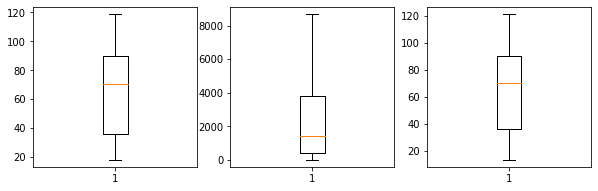

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(3,3,1)
plt.boxplot(data_encodeing["MonthlyCharges"])

plt.subplot(3,3,2)
plt.boxplot(data_encodeing["TotalCharges"])

plt.subplot(3,3,3)
plt.boxplot(data_encodeing["TotalCharges_PerMonth"])
plt.show()



# Correlation

In [21]:
correlation = data_encodeing.corr()
correlation['Churn'].sort_values(ascending = False)

Churn                    1.000000
MonthlyCharges           0.192858
TotalCharges_PerMonth    0.192033
PaperlessBilling         0.191454
SeniorCitizen            0.150541
PaymentMethod            0.107852
MultipleLines            0.038043
PhoneService             0.011691
gender                  -0.008545
StreamingTV             -0.036303
StreamingMovies         -0.038802
InternetService         -0.047097
Partner                 -0.149982
Dependents              -0.163128
DeviceProtection        -0.177883
OnlineBackup            -0.195290
TotalCharges            -0.199484
TechSupport             -0.282232
OnlineSecurity          -0.289050
tenure                  -0.354049
Contract                -0.396150
Name: Churn, dtype: float64

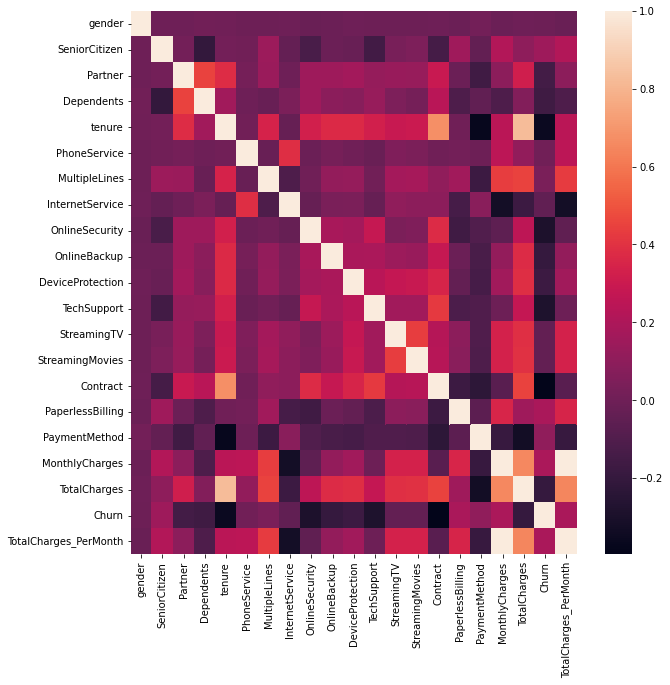

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(data_encodeing.corr())

# Data visualisation

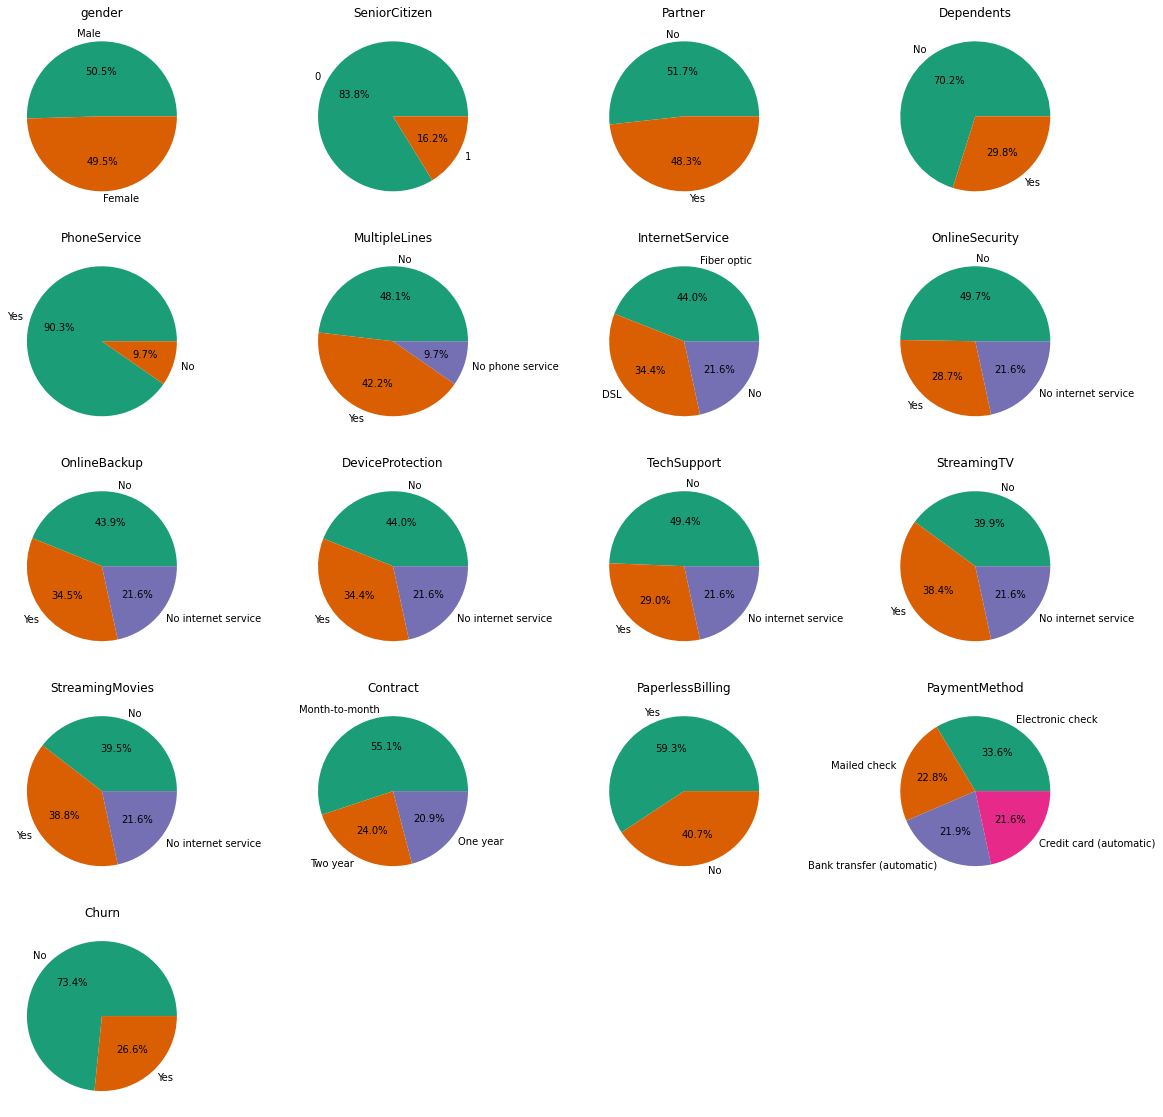

In [23]:
object_columns=['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
plt.figure(figsize=(20, 20))
cols = 4
for i, var in enumerate(object_columns):
    plt.subplot(len(object_columns) // cols + 1, cols, i+1)
    counts = data[var].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%',colors = plt.cm.Dark2.colors)
    plt.title(var)

plt.show()

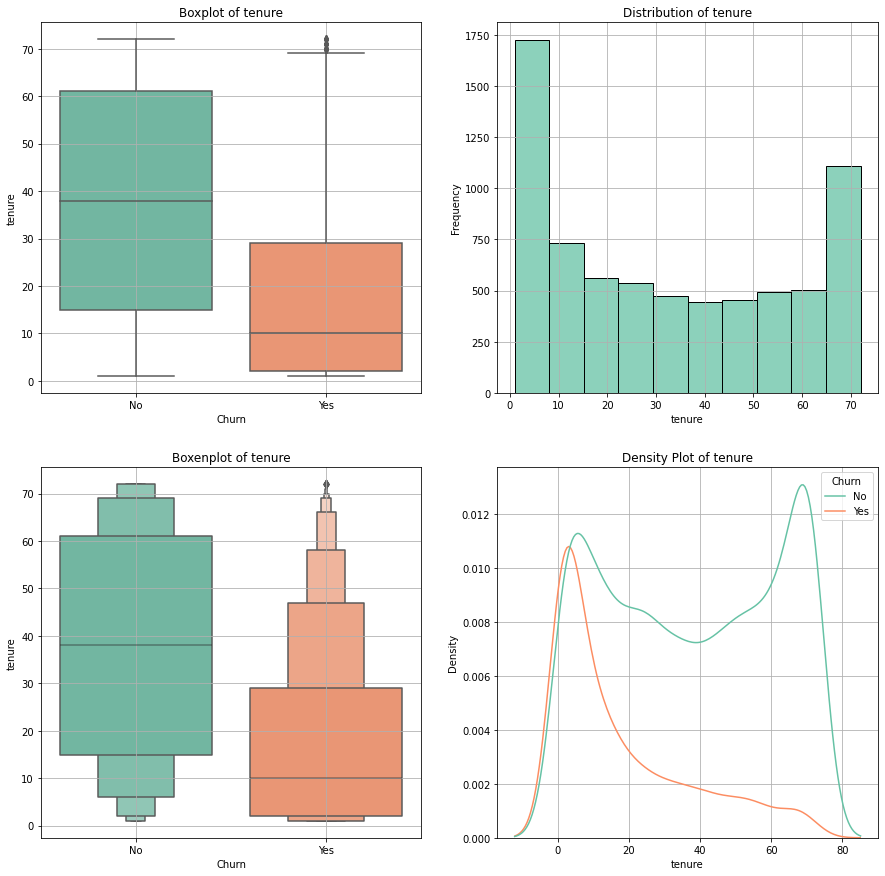

In [24]:
sns.set_palette('Set2')
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[0, 0])
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('tenure')
axes[0, 0].set_title('Boxplot of tenure')

sns.histplot(data['tenure'], bins=10, ax=axes[0, 1])
axes[0, 1].set_xlabel('tenure')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of tenure')

sns.boxenplot(x='Churn', y='tenure', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('tenure')
axes[1, 0].set_title('Boxenplot of tenure')

sns.kdeplot(x='tenure', hue='Churn', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('tenure')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Density Plot of tenure')

for ax in axes.flatten():
    ax.grid(True)

plt.show()

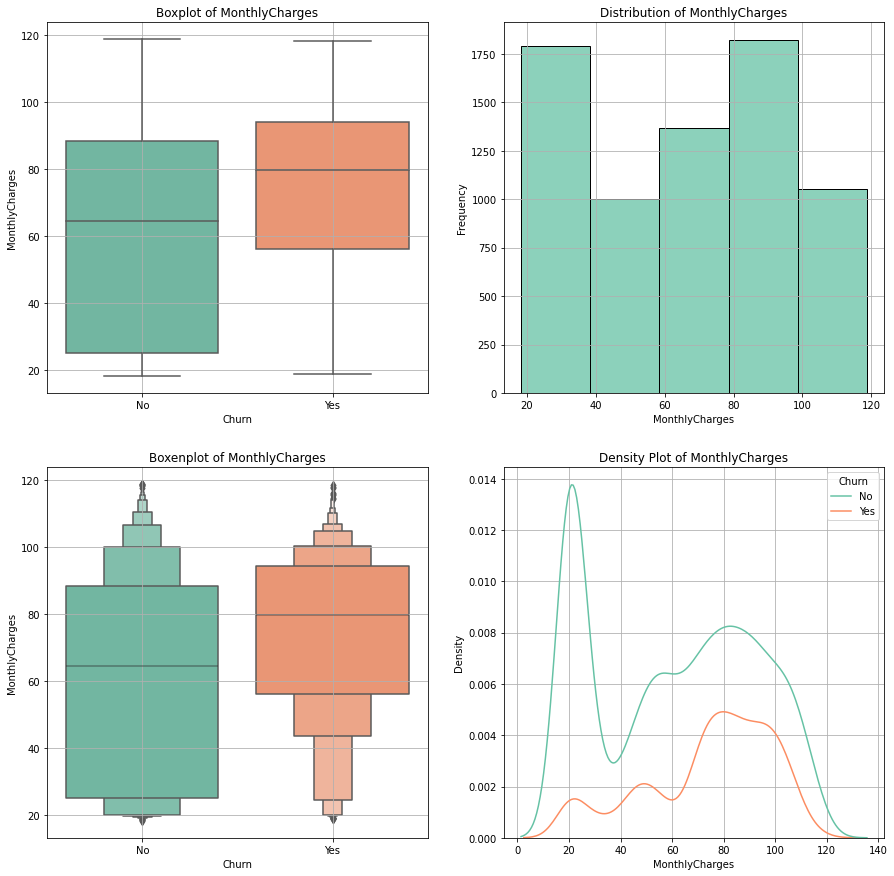

In [25]:
sns.set_palette('Set2')
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[0, 0])
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('MonthlyCharges')
axes[0, 0].set_title('Boxplot of MonthlyCharges')

sns.histplot(data['MonthlyCharges'], bins=5, ax=axes[0, 1])
axes[0, 1].set_xlabel('MonthlyCharges')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of MonthlyCharges')

sns.boxenplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('MonthlyCharges')
axes[1, 0].set_title('Boxenplot of MonthlyCharges')

sns.kdeplot(x='MonthlyCharges', hue='Churn', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('MonthlyCharges')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Density Plot of MonthlyCharges')

for ax in axes.flatten():
    ax.grid(True)

plt.show()

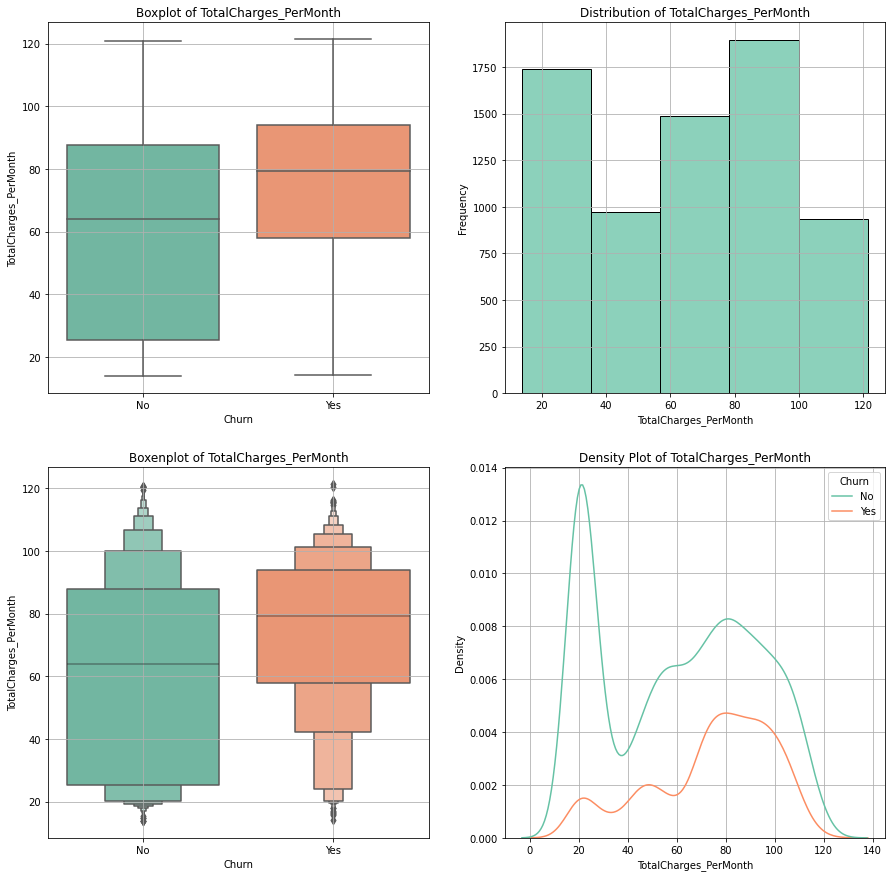

In [26]:
sns.set_palette('Set2')
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(x='Churn', y='TotalCharges_PerMonth', data=data, ax=axes[0, 0])
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('TotalCharges_PerMonth')
axes[0, 0].set_title('Boxplot of TotalCharges_PerMonth')

sns.histplot(data['TotalCharges_PerMonth'], bins=5, ax=axes[0, 1])
axes[0, 1].set_xlabel('TotalCharges_PerMonth')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of TotalCharges_PerMonth')

sns.boxenplot(x='Churn', y='TotalCharges_PerMonth', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('TotalCharges_PerMonth')
axes[1, 0].set_title('Boxenplot of TotalCharges_PerMonth')

sns.kdeplot(x='TotalCharges_PerMonth', hue='Churn', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('TotalCharges_PerMonth')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Density Plot of TotalCharges_PerMonth')

for ax in axes.flatten():
    ax.grid(True)

plt.show()


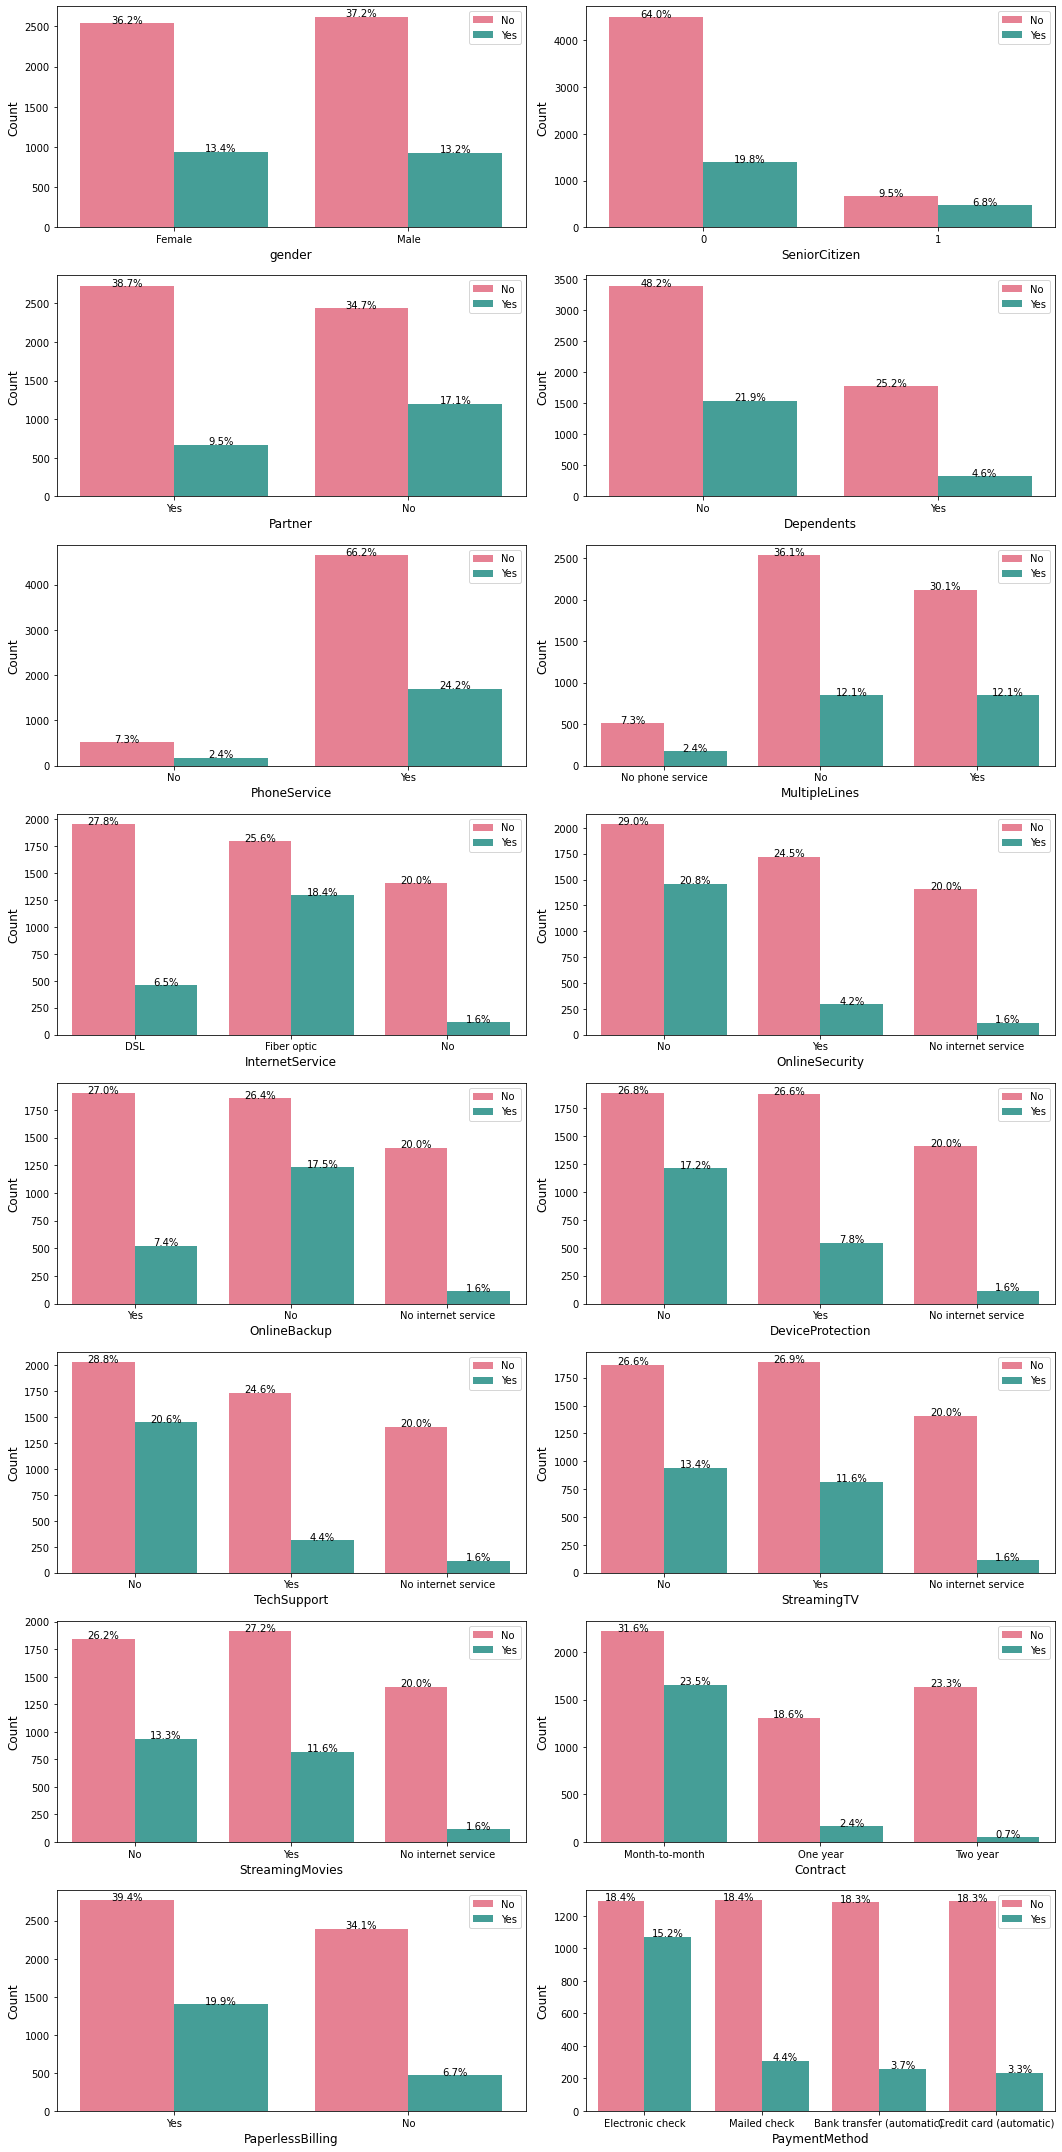

In [27]:
cat_vars = ['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    sns.countplot(x=col, hue='Churn', data=data, ax=axes[i],palette='husl')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    axes[i].legend(fontsize=10)
    total = float(len(data))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height/total) * 100), ha="center", fontsize=10)

plt.tight_layout()
plt.show()


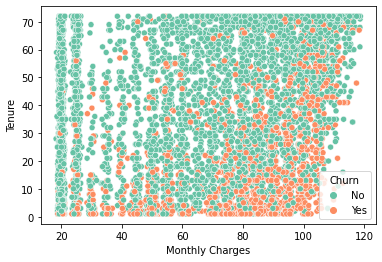

In [28]:
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=data)
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()

# Splitting data

In [29]:
X=data_encodeing.drop("Churn",axis=1)

In [30]:
y=data_encodeing["Churn"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42 )

# Feature Scalling

In [32]:
sc = StandardScaler()

In [33]:
sc.fit(X_train)  
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

# Classification Model

## LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
print(accuracy_score(y_test,y_pred))

0.785551763367463


In [38]:
confusion_matrix(y_test, y_pred)

array([[1141,  159],
       [ 218,  240]])

# Problems in company

## (i) Servise

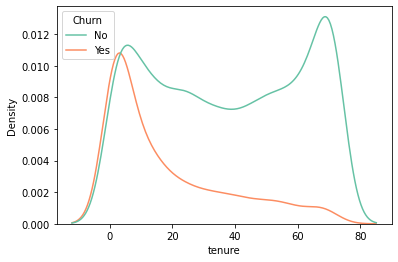

In [39]:
sns.kdeplot(x='tenure', hue='Churn', data=data)
ax.set_xlabel('tenure')
ax.set_ylabel('Density')
ax.set_title('Density Plot of tenure')
plt.show()

**Problem :** The above chart shows that the customer who are new customer they are churning

**Reason :** This shows that our servise are not good

**suggestion :** We have to reinovate our plans to satisfy our new customers.

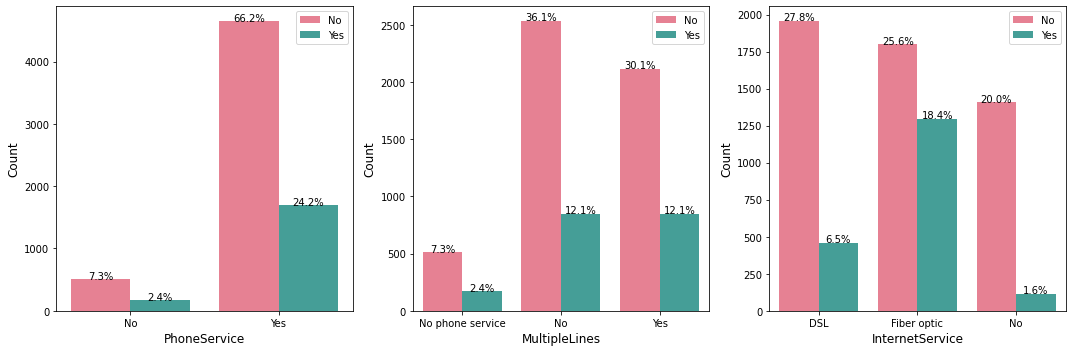

In [40]:
variables_conclusion = ['PhoneService', 'MultipleLines', 'InternetService']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(variables_conclusion):
    sns.countplot(x=col, hue='Churn', data=data, ax=axes[i],palette='husl')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    axes[i].legend(fontsize=10)
    total = float(len(data))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height/total) * 100), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

**Problem :** The above chart shows that the customer is not satisfied with Fiber optic Internet service  

**suggestion :** We have to reinitiate the servise for Fiber optic.

## (ii)Plan Cost

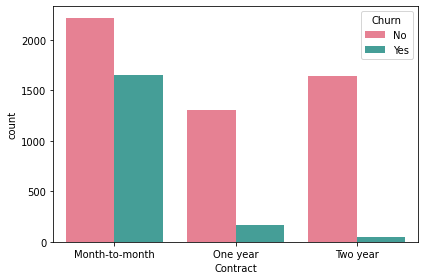

In [41]:
sns.countplot(x='Contract', hue='Churn', data=data,palette='husl')
ax.set_xlabel('Contract',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(labelsize=10)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

**Problem :** The above chart clearly shows that the customer who subscribe for month to month plan they are churning(left the company this quarter)

**Reason :** This shows that the plan is not afortable

**suggestion :** We have to reconsider the plan cost 

## (iii)Plans

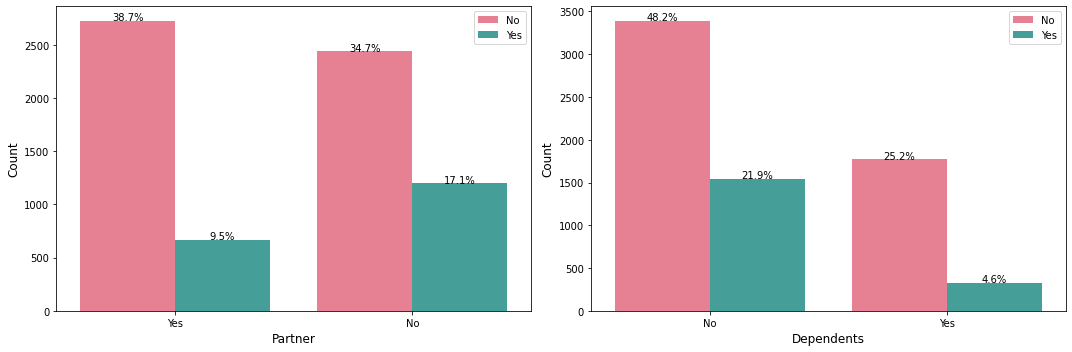

In [42]:
variables_conclusion = ['Partner','Dependents']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(variables_conclusion):
    sns.countplot(x=col, hue='Churn', data=data, ax=axes[i],palette='husl')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    axes[i].legend(fontsize=10)
    total = float(len(data))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height/total) * 100), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

**Problem :** The above chart clearly shows that the customer who haven't live with their family are churning(left the company this quarter)

**Reason :** This shows that there no such interacive plan for unmarried and independent customers

**suggestion :** We have to announce special plans for unmarried custemers

## (iv)Advertisement

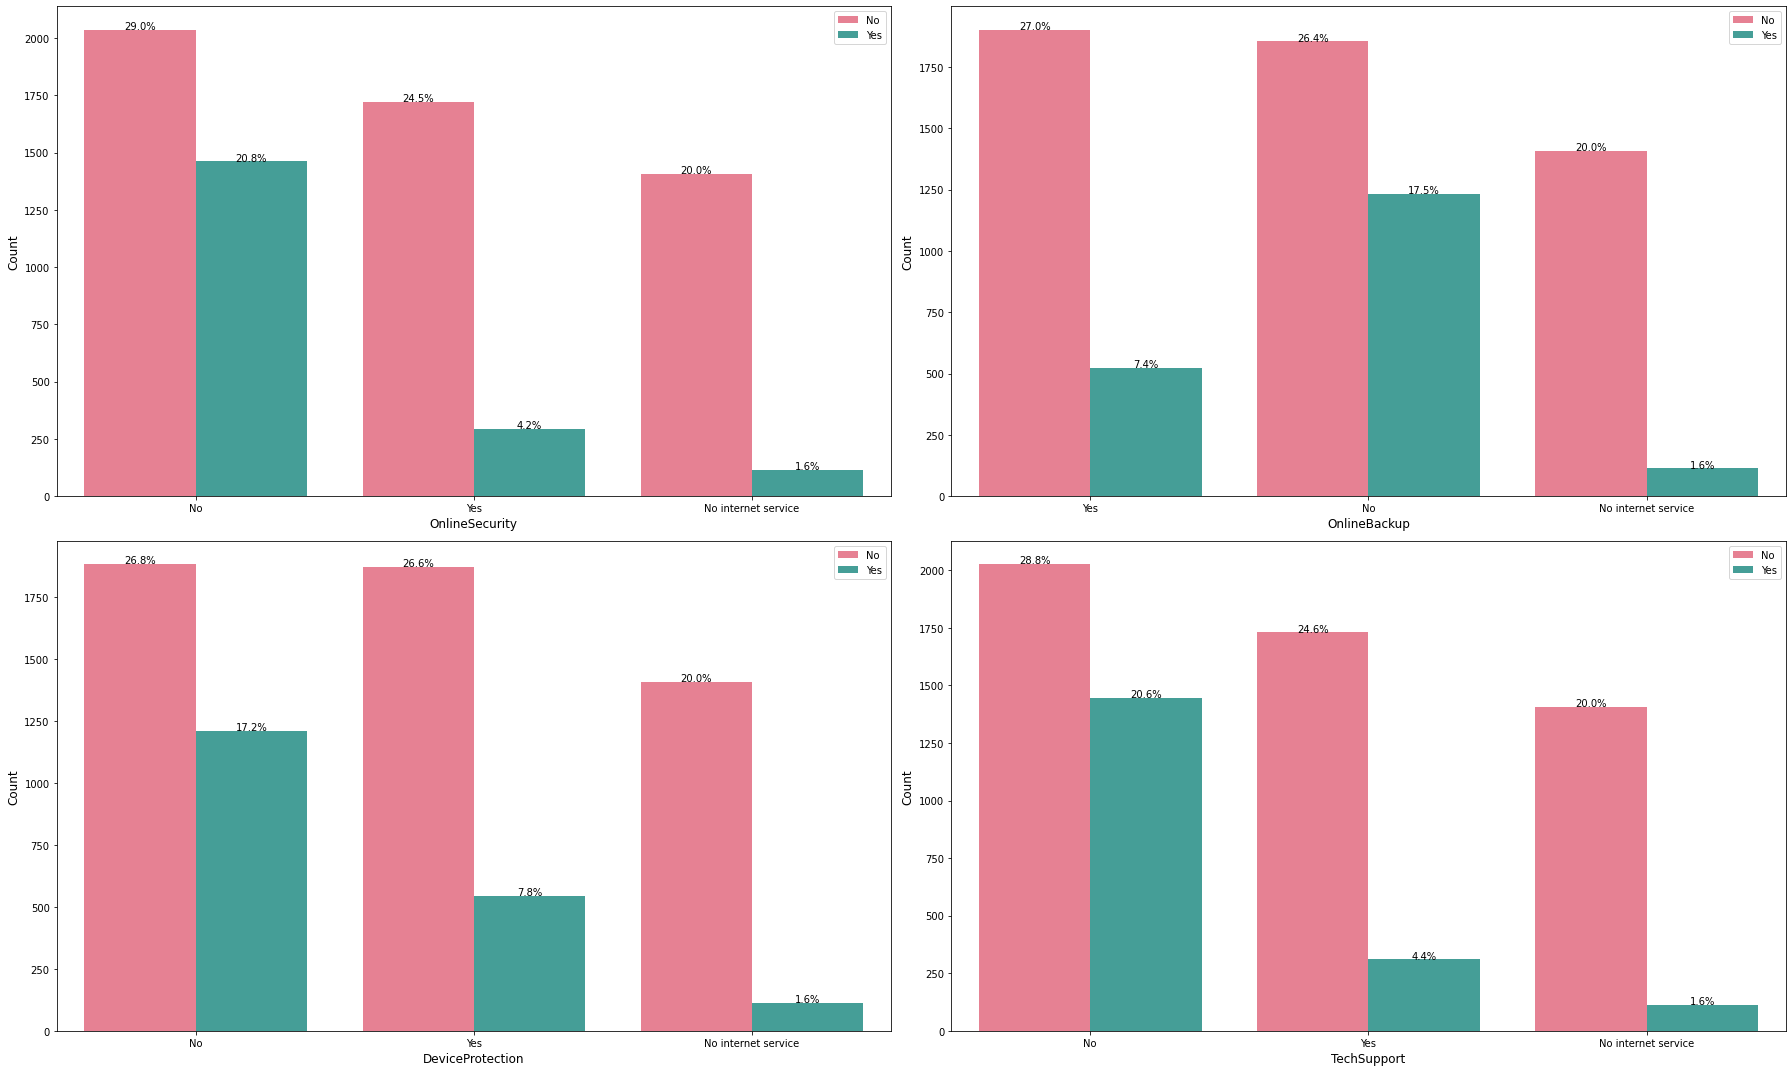

In [43]:
variables_conclusion = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
axes = axes.flatten()

for i, col in enumerate(variables_conclusion):
    sns.countplot(x=col, hue='Churn', data=data, ax=axes[i],palette='husl')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    axes[i].legend(fontsize=10)
    total = float(len(data))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height/total) * 100), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

**Problem :** The above chart shows that the customer who haven't knew about our plans such us 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport' they are churning(left the company this quarter)

**Reason :** This shows that there no awareness about our service plan 

**Suggestion :** We have to advertise about our service plan'

## (v)Payment Method

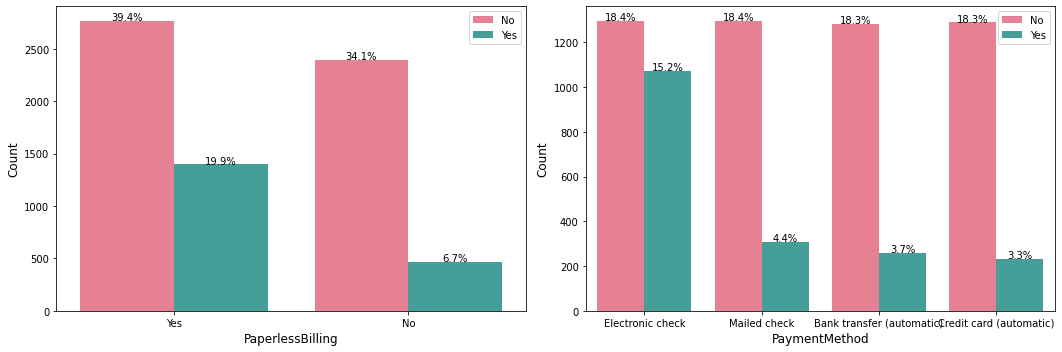

In [44]:
variables_conclusion = ['PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(variables_conclusion):
    sns.countplot(x=col, hue='Churn', data=data, ax=axes[i],palette='husl')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    axes[i].legend(fontsize=10)
    total = float(len(data))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height/total) * 100), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

**Problem :** The above chart shows that the customer who use electrical method for paying the bills are churning(left the company this quarter)

**Reason :** This shows that there is server issue durning the payement   

**Suggestion :** We have to redesign oru payment portal.

# Conclusion

  On analysing the data set, There is few problems related to Servise, Plan Cost, Plans, Advertisement, PaymentMethod

  There are few suggestion given below:

* Giving special offers to our new customers, they may continue with the subscription. 

* Revisal the Fiber optic cable.

* Reconsider the plan cost and make it affortanble.

* Announce special plans for single custemers.

* Advertise about our service plan.

* Redesign our payment portal.



